In [1]:
from tqdm import tqdm
tqdm.pandas()
from GitHub_Repo.CryptoSent.cs_models.distilbert import distil_bert_df
from GitHub_Repo.CryptoSent.cs_models.finbertlong import fin_bert_long
import pandas as pd

import re
import spacy #load spacy
nlp = spacy.load("en_core_web_sm", disable=['parser', 'tagger', 'ner'])
#stops = stopwords.words("english")
from spacy.lang.en.stop_words import STOP_WORDS
regex_magic= lambda x: ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split())

def text_preprocessing_spacy(comment, remove_stopwords):
    comment = comment.lower()
    comment=re.sub(r'http\S+', '', comment)
    comment=regex_magic(comment)
    comment = nlp(comment)
    lemmatized = list()
    for word in comment:
        lemma = word.lemma_.strip()
        if lemma:
            if not remove_stopwords or (remove_stopwords and lemma not in STOP_WORDS):
                lemmatized.append(lemma)
    out=" ".join(lemmatized)
    return out

In [2]:

subs=pd.read_pickle('Datasets/subs_lr_sent.pickle')

In [3]:
subs['clean_text']=subs.all_text.progress_apply(lambda x: text_preprocessing_spacy(x,True))

100%|██████████| 1559351/1559351 [07:19<00:00, 3551.94it/s]


In [4]:
subs.to_pickle('Datasets/submissions.pickle')

In [6]:
subs

,author,num_comments,score,title,selftext,award_name,award_description,award_count,award_coin_price,award_coin_reward,...,permalink,url,created,author_created,all_text,text_processed,sentiment_scores_lr,polarity_lr,sentiment_lr,clean_text
created,,,,,,,,,,,,,,,,,,,,,
2019-01-01 01:00:29,[deleted],0,1,DENT Exchange live. Time to recognize DENT!,[removed],Empty,Empty,Empty,Empty,Empty,...,/r/CryptoCurrency/comments/abcuni/dent_exchang...,https://www.reddit.com/r/CryptoCurrency/commen...,2019-01-01 01:00:29,NaT,DENT Exchange live. Time to recognize DENT!,dent exchange live time recognize dent,"(0.5817725311109663, 0.41822746888903367, Netu...",-0.162946,Netural,dent exchange live time recognize dent
2019-01-01 01:02:26,wwtt1210,1,80,[@litecoin] Happy New Year! 🎆 Let’s make 2019 ...,,Empty,Empty,Empty,Empty,Empty,...,/r/litecoin/comments/abcvc9/litecoin_happy_new...,https://mobile.twitter.com/litecoin/status/107...,2019-01-01 01:02:26,2016-04-20 03:15:05,[@litecoin] Happy New Year! 🎆 Let’s make 2019 ...,happy new year let s make 2019 awesome year li...,"(0.2029678957296449, 0.7970321042703551, Posit...",0.595210,Positive,happy new year let s 2019 awesome year litecoin
2019-01-01 01:02:52,GregGriffith,0,0,I have a mission if you choose to accept it...,I heard somewhere that a majority of CSWs twee...,Empty,Empty,Empty,Empty,Empty,...,/r/btc/comments/abcvgy/i_have_a_mission_if_you...,https://www.reddit.com/r/btc/comments/abcvgy/i...,2019-01-01 01:02:52,2015-06-13 18:33:47,I have a mission if you choose to accept it......,mission choose accept heard somewhere majority...,"(0.498516533180117, 0.501483466819883, Netural)",0.003686,Netural,mission choose accept hear majority csws tweet...
2019-01-01 01:03:57,Alderias,0,1,Buy XRP and Win a Lamborghini,[removed],Empty,Empty,Empty,Empty,Empty,...,/r/Ripple/comments/abcvu8/buy_xrp_and_win_a_la...,https://www.reddit.com/r/Ripple/comments/abcvu...,2019-01-01 01:03:57,2018-10-26 09:20:44,Buy XRP and Win a Lamborghini,buy xrp win lamborghini,"(0.27601717879312127, 0.7239828212068787, Posi...",0.449006,Positive,buy xrp win lamborghini
2019-01-01 01:05:35,bearCatBird,11,0,Are these accurate criticisms of Lightning Net...,I'm excited about LN. I'm in progress setting ...,Empty,Empty,Empty,Empty,Empty,...,/r/Bitcoin/comments/abcwdu/are_these_accurate_...,https://www.reddit.com/r/Bitcoin/comments/abcw...,2019-01-01 01:05:35,2009-08-23 01:00:21,Are these accurate criticisms of Lightning Net...,accurate criticisms lightning network m excite...,"(0.32077517859446736, 0.6792248214055326, Posi...",0.359426,Positive,accurate criticism lightning network excite ln...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-01 01:55:43,Professional-Code858,2,1,The 100th anniversary of the founding of the C...,[removed],Empty,Empty,Empty,Empty,Empty,...,/r/Bitcoin/comments/ob9qaj/the_100th_anniversa...,https://www.reddit.com/r/Bitcoin/comments/ob9q...,2021-07-01 01:55:43,2021-06-05 05:37:40,The 100th anniversary of the founding of the C...,100th anniversary founding communist party chi...,"(0.24241787708308604, 0.757582122916914, Posit...",0.516253,Positive,100th anniversary found communist party china ...
2021-07-01 01:56:36,Itsmeyasuo,0,1,✨Trace Network (Blockchain Service)✨NFT based ...,[removed],Empty,Empty,Empty,Empty,Empty,...,/r/CryptoCurrency/comments/ob9qu3/trace_networ...,https://www.reddit.com/r/CryptoCurrency/commen...,2021-07-01 01:56:36,2019-01-02 19:38:54,✨Trace Network (Blockchain Service)✨NFT based ...,trace network blockchain service nft based ent...,"(0.5654331991033743, 0.43456680089662575, Netu...",-0.130243,Netural,trace network blockchain service nft base ente...
2021-07-01 01:58:41,Imaginary_Activity_2,0,1,The cava token,[removed],Empty,Empty,Empty,Empty,Empty,...,/r/CryptoCurrencies/comments/ob9s26/the_cava_t...,https://www.reddit.com/r/CryptoCurrencies/comm...,2021-07-01 01:58:41,2020-10-25 23:37:59,The cava token,cava token,"(0.3862537925407864

In [7]:
# utilities
import re
import numpy as np
import pandas as pd
import string

from tqdm import tqdm
tqdm.pandas()


# plotting
import seaborn as sns
#from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import confusion_matrix, classification_report






#functions for printing the results of the Model
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

#spacy clean text
import spacy #load spacy
nlp = spacy.load("en_core_web_sm", disable=['parser', 'tagger', 'ner'])
stops = stopwords.words("english")
regex_magic= lambda x: ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split())

def text_preprocessing_spacy(comment, remove_stopwords):
    comment = comment.lower()
    comment=re.sub(r'http\S+', '', comment)
    comment=regex_magic(comment)
    comment = nlp(comment)
    lemmatized = list()
    for word in comment:
        lemma = word.lemma_.strip()
        if lemma:
            if not remove_stopwords or (remove_stopwords and lemma not in stops):
                lemmatized.append(lemma)
    out=" ".join(lemmatized)
    return out


# Importing the dataset
sent140 = pd.read_csv(r"/home/s192851/CryptoSent_Heisenberg/Datasets/sentiment140.csv",
                      encoding="ISO-8859-1" , names=["sentiment", "ids", "date", "flag", "user", "text"])
#taking the columns that we need
sent140 = sent140[['sentiment','text']]
sent140['sentiment'] = sent140['sentiment'].replace(4,1)
#preprocessing the text
sent140['text_clean']=sent140.text.progress_apply(lambda x: text_preprocessing_spacy(x,True))
#sent140['text_clean_join']=sent140.text_clean.progress_apply(lambda x: ' '.join(x))


X_train, X_test, y_train, y_test = train_test_split(sent140['text_clean'],
                                                    sent140.sentiment,
                                                    test_size = 0.05, random_state = 42)
word2vec = TfidfVectorizer(ngram_range=(1,2), max_features=50000)
word2vec.fit(X_train)
X_train = word2vec.transform(X_train)
X_test  = word2vec.transform(X_test)

#Linear SVC
clf = LogisticRegression(C=2,n_jobs=-1,max_iter=10000)
#Train the model
clf.fit(X_train, y_train)
model_Evaluate(clf)

# Getting the sentiment of the Tweets
def get_sentiment(text):
    text=word2vec.transform([text])
    neg,pos=clf.predict_proba(text)[0]
    if neg>.6:
        sentiment='Negative'
    elif pos>.6:
        sentiment='Positive'
    else:
        sentiment='Netural'
    return neg,pos,sentiment

list2doc=lambda x: ' '.join(x)

100%|██████████| 1600000/1600000 [03:39<00:00, 7305.27it/s]


              precision    recall  f1-score   support

           0       0.79      0.76      0.78     39999
           1       0.77      0.80      0.79     40001

    accuracy                           0.78     80000
   macro avg       0.78      0.78      0.78     80000
weighted avg       0.78      0.78      0.78     80000



In [10]:
subs['sentiment_scores_lr_v2']=subs.clean_text.progress_apply(get_sentiment)

100%|██████████| 1559351/1559351 [23:37<00:00, 1100.27it/s]


In [11]:
subs.to_pickle('Datasets/submissions.pickle')

In [12]:
subs.head().T

created,2019-01-01 01:00:29,2019-01-01 01:02:26,2019-01-01 01:02:52,2019-01-01 01:03:57,2019-01-01 01:05:35
author,[deleted],wwtt1210,GregGriffith,Alderias,bearCatBird
num_comments,0,1,0,0,11
score,1,80,0,1,0
title,DENT Exchange live. Time to recognize DENT!,[@litecoin] Happy New Year! 🎆 Let’s make 2019 ...,I have a mission if you choose to accept it...,Buy XRP and Win a Lamborghini,Are these accurate criticisms of Lightning Net...
selftext,[removed],,I heard somewhere that a majority of CSWs twee...,[removed],I'm excited about LN. I'm in progress setting ...
award_name,Empty,Empty,Empty,Empty,Empty
award_description,Empty,Empty,Empty,Empty,Empty
award_count,Empty,Empty,Empty,Empty,Empty
award_coin_price,Empty,Empty,Empty,Empty,Empty
award_coin_reward,Empty,Empty,Empty,Empty,Empty


In [20]:
subs[['clean_text','text_processed','sentiment_scores_lr_v2','sentiment_scores_lr']].iloc[2].clean_text                

'mission choose accept hear majority csws tweet picture alcohol hand background tweet protect doe follow want minute browse verify amp x200b note purely curiosity'

In [22]:
subs[['clean_text','text_processed','sentiment_scores_lr_v2','sentiment_scores_lr']].iloc[2].text_processed             

'mission choose accept heard somewhere majority csws tweeted pictures either alcohol hand background somewhere tweets protected someone following want take minutes browse verify amp x200b note purely curiosity nothing'

# 

In [1]:
# distil bert on top 10% by day
from tqdm import tqdm
tqdm.pandas()
from GitHub_Repo.CryptoSent.cs_models.distilbert import distil_bert_df
#from GitHub_Repo.CryptoSent.cs_models.finbertlong import fin_bert_long
import pandas as pd
subs=pd.read_pickle('Datasets/submissions.pickle')
subs=subs[subs.index.date.astype(str)!='2021-07-01']
subs['date_str']=subs.index.date.astype(str)
#take only Bitcoin and btc subreddits
bit=subs[subs.subreddit.isin(['Bitcoin','btc'])]
top10pct=bit.groupby('date_str',group_keys=False).apply(lambda x: x.nlargest(int(len(x) * 0.1), 'score')).sort_index()
top10pct=distil_bert_df(top10pct,text='clean_text',output_type='sentiment')

100%|██████████| 37025/37025 [1:34:31<00:00,  6.53it/s]


In [2]:
top10pct.to_pickle('db_top10.pickle')
btcbit=subs[subs.clean_text.str.contains('|'.join(['btc','bitcoin']))]
top10pctbtcbit=btcbit.groupby('date_str',group_keys=False).apply(lambda x: x.nlargest(int(len(x) * 0.1), 'score')).sort_index()
top10pctbtcbit=distil_bert_df(top10pctbtcbit,text='clean_text',output_type='sentiment')
top10pctbtcbit.to_pickle('db_top10_keyword.pickle')


In [5]:
from matplotlib import pyplot as plt 

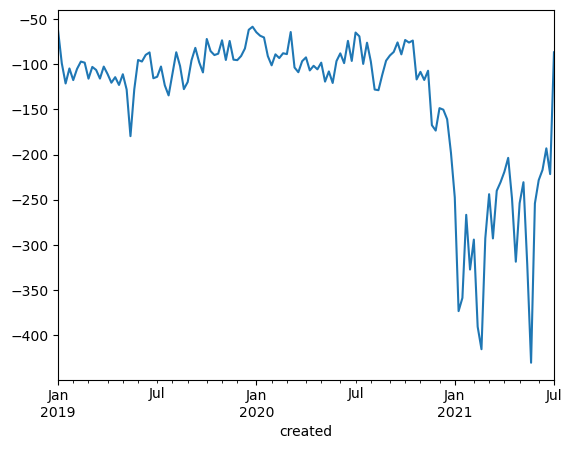

In [16]:
top10pct[top10pct.sent_db!='no_score'].resample('w').sent_db.sum().plot()
plt.show()

# Posts that contains btc or bitcoin

In [1]:
import pandas as pd
from matplotlib import pyplot as plt 
import numpy as np
from tqdm import tqdm
tqdm.pandas()

def get_experts(df):
    df.award_count=df.award_count.replace('Empty',0)
    df.award_coin_price=df.award_coin_price.replace('Empty',0)
    df['kpi1']=df.apply(lambda row: row['award_count']*row['award_coin_price'] if type(row['award_count'])==int
                                            else sum(np.multiply(np.array(list(row['award_count'])),np.array(list(row['award_coin_price'])))),axis=1)

    #top_authors=df[df.author!='[deleted]'].sort_values(by='kpi1',ascending=False).head(1000).author.unique().tolist()
    #return top_authors
    #top_authors_df=top[top.author.isin(get_experts(top))]

    
subs=pd.read_pickle('Datasets/submissions.pickle')


In [2]:
get_experts(subs)

In [5]:
subs.sort_values(by='kpi1',ascending=False).head().T

created,2021-05-23 20:58:34,2021-05-10 20:29:24,2021-02-05 22:00:00,2020-07-31 17:50:47,2021-05-15 17:59:12
author,BurnieSlander,hazelvelvet,[deleted],BitcoinFan7,Bangus_McFife
num_comments,1715,2427,1939,681,87
score,5386,19640,14293,1011,1184
title,The Real Reason Crypto is Tanking,Not every new coin is a shitcoin: How to spot ...,Selling all my crypto because of an authoritar...,Bitcoin Newcomers FAQ - Please read!,🍩MUNCH🍩 Token | Fully doxxed team | BSC bridge...
selftext,[removed],"A few days ago, I made a post titled *""Rugpull...","Hi guys,\n\nI'm from a third world country cal...",# Welcome to the /r/Bitcoin Sticky FAQ\n\nYou'...,🍩MUNCH Just reached 7k holders! Low Mcap. It h...
award_name,"(Sidevote, Take My Power, Bravo Grande!, Whole...","(Take My Power, Bravo Grande!, Wholesome Seal ...","(Take My Power, All-Seeing Upvote, LOVE!, Tern...","(All-Seeing Upvote, This, Party Train, Ternion...","(Sidevote, Take My Power, Bravo Grande!, Whole..."
award_description,"(Not an upvote, not a downvote, just an in-the...","(Add my power to yours., For an especially ama...","(Add my power to yours., A glowing commendatio...","(A glowing commendation for all to see, THIS r...","(Not an upvote, not a downvote, just an in-the..."
award_count,"(1, 3, 2, 2, 3, 4123, 1, 1, 1, 2, 4, 1, 1, 2, ...","(1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 10, 1, 2, 1, 3,...","(1, 3, 1, 1, 7, 3, 2, 1, 1, 42, 30, 41, 1, 42,...","(2, 1, 1, 1, 1, 1, 2, 1, 10, 1, 14, 8, 16, 1, ...","(1, 1, 1, 2, 2, 4, 4, 2, 1, 1, 1, 1, 1, 1, 1, ..."
award_coin_price,"(200, 75, 75, 30, 30, 30, 20, 200, 75, 1800, 5...","(75, 75, 30, 30, 30, 250, 250, 200, 1800, 500,...","(75, 30, 20, 50000, 1800, 500, 500, 300, 300, ...","(30, 300, 75, 50000, 20000, 500, 400, 325, 300...","(200, 75, 75, 30, 30, 30, 20, 20, 250, 250, 20..."
award_coin_reward,"(0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 100, 0, 0, 0,...","(0, 0, 0, 0, 0, 100, 100, 0, 0, 100, 100, 0, 0...","(0, 0, 0, 5000, 0, 100, 100, 0, 250, 0, 0, 0, ...","(0, 250, 100, 5000, 2500, 100, 0, 0, 0, 0, 0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 250, 100, ..."


In [13]:
subs.loc[(subs.subreddit.isin(['Bitcoin','btc']))|(subs.clean_text.str.contains('bitcoin','btc')),'topic']='Bitcoin'

In [20]:
subs[subs.topic=='Bitcoin'].sort_values(by='kpi1',ascending=False)

,author,num_comments,score,title,selftext,award_name,award_description,award_count,award_coin_price,award_coin_reward,...,url,created,author_created,clean_text,origin,sent_db,sent_fb,sent_lr,kpi1,topic
created,,,,,,,,,,,,,,,,,,,,,
2021-02-05 22:00:00,[deleted],1939,14293,Selling all my crypto because of an authoritar...,"Hi guys,\n\nI'm from a third world country cal...","(Take My Power, All-Seeing Upvote, LOVE!, Tern...","(Add my power to yours., A glowing commendatio...","(1, 3, 1, 1, 7, 3, 2, 1, 1, 42, 30, 41, 1, 42,...","(75, 30, 20, 50000, 1800, 500, 500, 300, 300, ...","(0, 0, 0, 5000, 0, 100, 100, 0, 250, 0, 0, 0, ...",...,https://www.reddit.com/r/CryptoCurrency/commen...,2021-02-05 22:00:00,NaT,sell crypto authoritarian government hello guy...,top10_percent,-0.993365,-0.011505,0.751353,83815,Bitcoin
2020-07-31 17:50:47,BitcoinFan7,681,1011,Bitcoin Newcomers FAQ - Please read!,# Welcome to the /r/Bitcoin Sticky FAQ\n\nYou'...,"(All-Seeing Upvote, This, Party Train, Ternion...","(A glowing commendation for all to see, THIS r...","(2, 1, 1, 1, 1, 1, 2, 1, 10, 1, 14, 8, 16, 1, ...","(30, 300, 75, 50000, 20000, 500, 400, 325, 300...","(0, 250, 100, 5000, 2500, 100, 0, 0, 0, 0, 0, ...",...,https://www.reddit.com/r/Bitcoin/comments/i19u...,2020-07-31 17:50:47,2019-02-20 18:54:28,bitcoin newcomer faq read welcome r bitcoin st...,top10_percent,0.000000,-0.000709,0.166828,81560,Bitcoin
2021-05-15 17:59:12,Bangus_McFife,87,1184,🍩MUNCH🍩 Token | Fully doxxed team | BSC bridge...,🍩MUNCH Just reached 7k holders! Low Mcap. It h...,"(Sidevote, Take My Power, Bravo Grande!, Whole...","(Not an upvote, not a downvote, just an in-the...","(1, 1, 1, 2, 2, 4, 4, 2, 1, 1, 1, 1, 1, 1, 1, ...","(200, 75, 75, 30, 30, 30, 20, 20, 250, 250, 20...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 250, 100, ...",...,https://www.reddit.com/r/altcoin/comments/nd21...,2021-05-15 17:59:12,2017-08-28 11:51:50,munch token fully doxxed team bsc bridge 2 wee...,top10_percent,-0.992024,0.001101,-0.863667,76990,Bitcoin
2021-01-07 11:50:33,anonymousoctopus777,683,13347,"STFU, just vibe with me. Embrace it.",,"(Take My Power, Starstruck, LOVE!, Made Me Smi...","(Add my power to yours., Can't stop seeing sta...","(2, 1, 1, 1, 8, 1, 9, 7, 2, 4, 2, 2, 1, 29, 1,...","(75, 20, 20, 500, 75, 20000, 1800, 500, 500, 4...","(0, 0, 0, 100, 100, 2500, 0, 100, 100, 0, 0, 0...",...,https://v.redd.it/d6rr76qa4w961,2021-01-07 11:50:33,2019-12-21 02:52:40,stfu vibe embrace,top10_percent,0.993197,0.049168,-0.863150,73505,Bitcoin
2021-02-08 14:29:30,MediumAdhesiveness5,2183,18985,MEGATHREAD: Tesla buys $1.5 billion in bitcoin...,Tesla announced in an SEC filing Monday that i...,"(Take My Power, All-Seeing Upvote, Starstruck,...","(Add my power to yours., A glowing commendatio...","(1, 2, 2, 3, 1, 1, 1, 1, 4, 1, 1, 27, 27, 29, ...","(75, 30, 20, 20, 500, 75, 50000, 1800, 500, 32...","(0, 0, 0, 0, 0, 100, 5000, 0, 100, 0, 0, 0, 0,...",...,https://www.reddit.com/r/CryptoCurrency/commen...,2021-02-08 14:29:30,2019-02-12 13:39:12,megathread tesla buy 1 5 billion bitcoin plan ...,top10_percent,-0.929337,0.060612,-0.135379,67760,Bitcoin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-18 16:22:54,jro04,1,1,What is Bitcoin today?,[removed],Empty,Empty,0,0,Empty,...,https://www.reddit.com/r/CryptoCurrency/commen...,2019-11-18 16:22:54,2017-06-03 11:21:35,bitcoin today,main,0.000000,0.000000,0.026675,0,Bitcoin
2019-11-18 16:19:35,BitcoinDepot,0,1,Bitcoin Depot recently surpassed 300 bitcoin A...,,Empty,Empty,0,0,Empty,...,https://twitter.com/Bitcoin_Depot/status/11964...,2019-11-18 16:19:35,2016-07-03 18:59:33,bitcoin depot recently surpass 300 bitcoin atms,main,0.000000,0.000000,-0.286853,0,Bitcoin
2019-11-18 16:14:30,thekcoinz,9,25,Bitcoin is up 5.34 % for the month and 61.72% ...,,Empty,Empty,0,0,Empty,...,https://www.reddit.com/r/Bitcoin/comments/dy4g...,2019-11-18 16:14:30,2017-11-23 12:08:02,bitcoin 5 34 month 61 72 year,main,0.000000,0.000000,0.221